# BioLiP overview

## Setup

Add user's current working directory to search path:

In [1]:
import sys
sys.path = [r"C:\sw\plb"] + sys.path

Also change current working directory:

In [2]:
import os
os.chdir(r"C:\sw\plb")

Imports:

In [3]:
from collections import Counter
from pathlib import Path

import myst_nb

from src.config import get_config
from src.data.biolip.io import read_biolip_index
from src.data_structure_utils import read_tsv
from src.stats_utils import (
    get_stats_from_counter,
    print_counter_stats_df,
    print_raw_ligand_smiles_stats,
    print_raw_protein_seq_stats,
)

Set up document options:

In [4]:
# This import automatically sets seeds
import src.set_seed

# Nice pandas tables
import itables
itables.init_notebook_mode(all_interactive=True)
itables.options.maxColumns = 0  # unlimited columns
itables.options.maxBytes = 32000000
itables.options.classes = ["display", "nowrap"]
itables.options.order = [] # disable auto-sorting

<IPython.core.display.Javascript object>

Get filepaths of data directories:

In [5]:
config = get_config()
dir_data = Path(config["data_directory"])
dir_features = Path(config["features_directory"])

## Displaying some sample data

BioLiP is a collection of joint protein-ligand structures determined from experiments.

Load processed BioLiP dataframes:

In [6]:
dfs_biolip = read_biolip_index(dir_data / "biolip/filtered_index")
df_ann = dfs_biolip.ann
df_prot = dfs_biolip.prot
df_lig = dfs_biolip.lig

Print a few sample rows from the annotations dataframe:

In [7]:
itables.show(df_ann.sample(3))

Loading... (need help?)


The annotations dataframe has these columns:

In [8]:
itables.show(DataFrame({"column_name": df_ann.columns}))

Loading... (need help?)


Some of the important columns include:

- `pdb_id`, this is the original PDB entry that the structure data comes from
- `chain_sequence` is the protein's amino acid sequence


## Filtering

In [9]:
# Get variables from config file for the following section

# min_aa = config["protein_chain_min_aa_length"]
# myst_nb.glue("min_aa", min_aa)

# max_aa = config["protein_chain_max_aa_length"]
# myst_nb.glue("max_aa", max_aa)

# lig_allowed_el = config["ligand_allowed_elements"]
# myst_nb.glue("lig_allowed_el", lig_allowed_el)

# min_atoms = config["ligand_min_number_of_non_hydrogen_atoms_allowed"]
# myst_nb.glue("min_atoms", min_atoms)

# max_atoms = config["ligand_max_number_of_non_hydrogen_atoms_allowed"]
# myst_nb.glue("max_atoms", max_atoms)

The dataframe displayed above has been heavily filtered. The filtering steps I
performed are:

- Removed entries with missing PDB structures (not sure why some are missing, I'll investigate this later)
- Filtered to keep only entries with protein chains satisfying {glue:}`min_aa` <
  length < {glue:}`max_aa`
- Removed entries with unusual amino acids (e.g. selenocysteine) or unknown
  amino acids (`X` symbol)
- Filtered out entries with unknown ligands (i.e. ligand definition not listed in the PDB Chemical Components Dictionary; I'm not sure why some are missing from here)
- Filtered out entries with unsuitable ligand types (e.g. nucleic acids)
- Filtered to keep only entries where the PDB file has the following elements:

In [10]:
config["ligand_allowed_elements"]

['H', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'Cl', 'Br', 'I']

- Filtered to keep only entries that have a single protein chain and single ligand present


## Data statistics

### Overall

The total number of entries (after filtering) is:

In [11]:
len(df_ann)

20220

### Proteins

Here are some statistics on the proteins present in BioLiP.

Total number of entries: 20220
Total number of unique entries: 13226
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


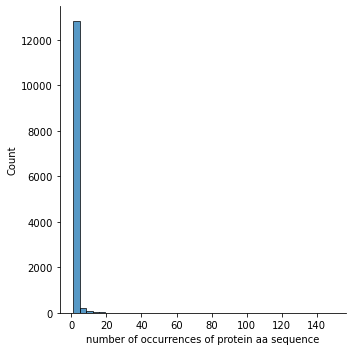

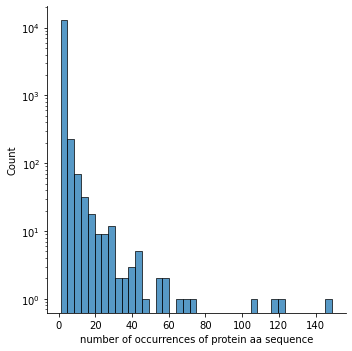

In [12]:
protein_stats = print_raw_protein_seq_stats(df_ann)

The most commonly occurring entries are:

In [13]:
print_counter_stats_df(protein_stats)

Loading... (need help?)


### Ligands

Here are some statistics on the ligands present in BioLiP.

Total number of entries: 20220
Total number of unique entries: 9619
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


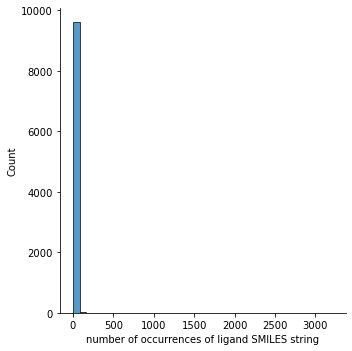

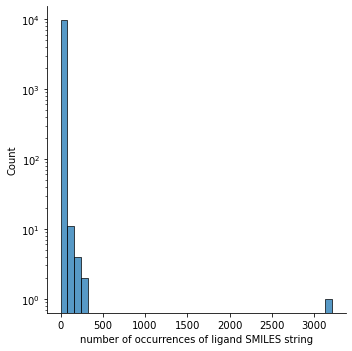

In [14]:
ligand_stats = print_raw_ligand_smiles_stats(df_lig)

The most commonly occurring entries are:

In [15]:
print_counter_stats_df(ligand_stats)

Loading... (need help?)
